In [3]:
# Importing necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
crime = pd.read_parquet("/Users/samuelbamgbola/Downloads/Crime-HamoyeAI-Capstone-Project/africa_cleaned_for_deployment.parquet")

In [4]:
crime.shape

(315940, 33)

In [5]:
crime.head()

EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION       DISORDER_TYPE  \
0          ALG1 1997-01-01  1997               1  Political violence   
1          ALG2 1997-01-02  1997               1  Political violence   
2          ALG3 1997-01-03  1997               1  Political violence   
3          ALG4 1997-01-04  1997               1  Political violence   
4          ALG5 1997-01-05  1997               1  Political violence   

                   EVENT_TYPE SUB_EVENT_TYPE                    ACTOR1  \
0  Violence against civilians         Attack  GIA: Armed Islamic Group   
1  Violence against civilians         Attack  GIA: Armed Islamic Group   
2  Violence against civilians         Attack  GIA: Armed Islamic Group   
3  Violence against civilians         Attack  GIA: Armed Islamic Group   
4  Violence against civilians         Attack  GIA: Armed Islamic Group   

  ASSOC_ACTOR_1  INTER1  ... LONGITUDE GEO_PRECISION         SOURCE  \
0          None       2  ...     2.789             1  Algeria Watch   
1          None       2  ...     0.883             1  Algeria Watch   
2          None       2  ...    -0.290             1  Algeria Watch   
3          None       2  ...     2.829             1  Algeria Watch   
4          None       2  ...     2.789             1  Algeria Watch   

   SOURCE_SCALE                                              NOTES  \
0         Other  5 January: Beheading of 5 citizens in Douaouda...   
1         Other            Two citizens were beheaded in Hassasna.   
2         Other  Two citizens were killed in a raid on the vill...   
3         Other  4 January: 16 citizens were murdered in the vi...   
4         Other  5 January: Killing of 18 citizens in the Olivi...   

   FATALITIES  TAGS   TIMESTAMP fatalites-binned fatalities-binned-encoded  
0           5  None  1582579226          2_TO_10                         3  
1           2  None  1582579226          2_TO_10                         3  
2           2  None  1582579226          2_TO_10                         3  
3          16  None  1582579226         11_TO_50                         1  
4          18  None  1582579226         11_TO_50                         1  

[5 rows x 33 columns]

In [6]:
crime.isna().sum()

EVENT_ID_CNTY                     0
EVENT_DATE                        0
YEAR                              0
TIME_PRECISION                    0
DISORDER_TYPE                     0
EVENT_TYPE                        0
SUB_EVENT_TYPE                    0
ACTOR1                            0
ASSOC_ACTOR_1                231997
INTER1                            0
ACTOR2                        86136
ASSOC_ACTOR_2                253699
INTER2                            0
INTERACTION                       0
CIVILIAN_TARGETING           220363
ISO                               0
REGION                            0
COUNTRY                           0
ADMIN1                            0
ADMIN2                         2451
ADMIN3                       161453
LOCATION                          0
LATITUDE                          0
LONGITUDE                         0
GEO_PRECISION                     0
SOURCE                            0
SOURCE_SCALE                      0
NOTES                       

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuelbamgbola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


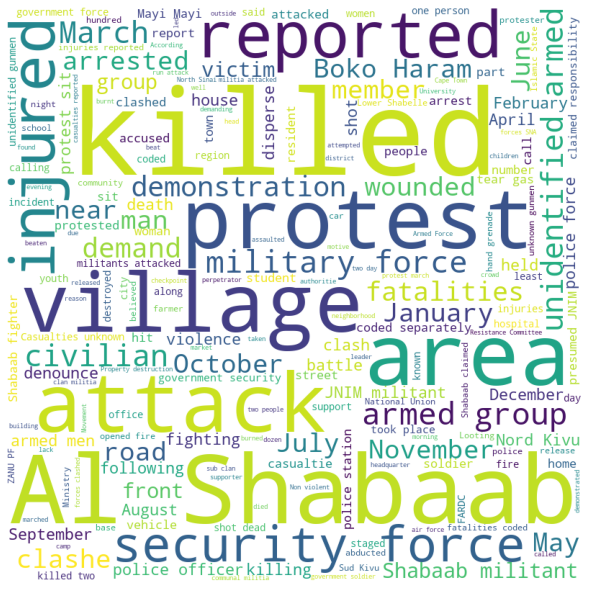

In [5]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk


# Extract text from a particular column of the dataframe
text = ' '.join(crime['NOTES'].astype(str).tolist())

# Load stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Generate a wordcloud from the extracted text
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords).generate(text)

# Display the wordcloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [7]:
## Checking missing values in different columns

In [8]:
missing_admin2 = crime.loc[crime['ADMIN2'].isna()]

In [9]:
missing_admin2.groupby(['COUNTRY'])['COUNTRY'].count()

COUNTRY
Algeria                                         776
Benin                                             1
Comoros                                          11
Democratic Republic of Congo                    796
Lesotho                                         220
Mauritius                                       357
Mayotte                                         121
Nigeria                                           1
Republic of Congo                                 1
Reunion                                           2
Rwanda                                          127
Saint Helena, Ascension and Tristan da Cunha      2
Sao Tome and Principe                            25
Seychelles                                       11
Name: COUNTRY, dtype: int64

In [10]:
crime.loc[crime['COUNTRY']=='Seychelles'][['ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE']]

ADMIN1 ADMIN2 ADMIN3        LOCATION  LATITUDE  LONGITUDE
176151      Bel Air   None   None        Victoria    -4.623     55.452
176152      Bel Air   None   None        Victoria    -4.623     55.452
176153      Bel Air   None   None        Victoria    -4.623     55.452
176154      Bel Air   None   None        Victoria    -4.623     55.452
176155      Bel Air   None   None        Victoria    -4.623     55.452
176156      Bel Air   None   None        Victoria    -4.623     55.452
176157      Bel Air   None   None        Victoria    -4.623     55.452
176158  Mont Fleuri   None   None     Mont Fleuri    -4.633     55.458
176159      Bel Air   None   None         Bel Air    -4.629     55.445
176160      Bel Air   None   None        Victoria    -4.623     55.452
176161  Baie Lazare   None   None  Anse La Mouche    -4.735     55.492

### Defining Features for Selection

In [11]:
features = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION', 'EVENT_TYPE', 'SUB_EVENT_TYPE',
            'ACTOR1', 'INTER1', 'INTER2', 'INTERACTION']
target = ['FATALITIES']

In [12]:
crime.loc[crime['ACTOR1']=='Al Shabaab'].groupby('COUNTRY')['COUNTRY'].count()

COUNTRY
Djibouti        1
Ethiopia        4
Kenya         530
Somalia     11096
Tanzania        6
Uganda          3
Name: COUNTRY, dtype: int64

In [13]:
crime.loc[crime['ACTOR1']=='Al Shabaab'].groupby('ACTOR1')['FATALITIES'].sum()

ACTOR1
Al Shabaab    19739
Name: FATALITIES, dtype: int64

### Checking Missing Values in ADMIN1

In [14]:
missing_admin1 = crime.loc[crime['ADMIN1'].isna()]

In [15]:
missing_admin1[['COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE']]

Empty DataFrame
Columns: [COUNTRY, ADMIN1, ADMIN2, ADMIN3, LOCATION, LATITUDE, LONGITUDE]
Index: []

In [16]:
crime.loc[crime['LOCATION']=='Coast of Benin']

EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION       DISORDER_TYPE  \
71777        BEN400 2021-05-31  2021               1  Political violence   

                       EVENT_TYPE SUB_EVENT_TYPE           ACTOR1  \
71777  Violence against civilians         Attack  Pirates (Benin)   

      ASSOC_ACTOR_1  INTER1  ... LONGITUDE GEO_PRECISION  \
71777          None       3  ...     2.164             3   

                        SOURCE               SOURCE_SCALE  \
71777  AFP; Xinhua; Actu Benin  Subnational-International   

                                                   NOTES  FATALITIES  TAGS  \
71777  On 31 May 2021, sea pirates attacked a fishing...           0  None   

        TIMESTAMP fatalites-binned fatalities-binned-encoded  
71777  1624310472      NO_FATALITY                         6  

[1 rows x 33 columns]

In [17]:
crime.loc[crime['LOCATION']=='Gulf of Guinea']

EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION       DISORDER_TYPE  \
155784      NIG27797 2018-11-11  2018               1  Political violence   

       EVENT_TYPE SUB_EVENT_TYPE                              ACTOR1  \
155784    Battles    Armed clash  Military Forces of Nigeria (2015-)   

       ASSOC_ACTOR_1  INTER1  ... LONGITUDE GEO_PRECISION  \
155784          None       1  ...     1.328             3   

                                            SOURCE  \
155784  Risk and Strategic Management, Corporation   

                       SOURCE_SCALE  \
155784  Local partner-International   

                                                    NOTES  FATALITIES  TAGS  \
155784  On 11 November 2018, the Nigerian Navy interce...           0  None   

         TIMESTAMP fatalites-binned fatalities-binned-encoded  
155784  1666026860      NO_FATALITY                         6  

[1 rows x 33 columns]

### Feature Selection

In [18]:
X = crime[features]
y = crime["FATALITIES"]

In [19]:
X.shape

(315940, 11)

In [20]:
X.isna().sum()

DISORDER_TYPE     0
REGION            0
COUNTRY           0
ADMIN1            0
LOCATION          0
EVENT_TYPE        0
SUB_EVENT_TYPE    0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
dtype: int64

In [21]:
# Dealing with missing values in ADMIN1

X.loc[71777:71777,'ADMIN1'] = "Oueme"
X.loc[155784:155784,'ADMIN1'] = "Bayelsa"

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [22]:
X.isna().sum()

DISORDER_TYPE     0
REGION            0
COUNTRY           0
ADMIN1            0
LOCATION          0
EVENT_TYPE        0
SUB_EVENT_TYPE    0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
dtype: int64

### Performing Binning on Fatalities

In [23]:
fatalities_bins = [-1, 0, 1, 10, 50, 100, 500, 1350]
group_names = ["NO_FATALITY", "1_FATALITY", "2_TO_10", "11_TO_50", "51_TO_100", "101_TO_500", "501_TO_1350"]

In [24]:
crime["fatalites-binned"] = pd.cut(crime["FATALITIES"], fatalities_bins, labels=group_names, include_lowest = True)
crime[['FATALITIES', 'fatalites-binned']].head()

FATALITIES fatalites-binned
0           5          2_TO_10
1           2          2_TO_10
2           2          2_TO_10
3          16         11_TO_50
4          18         11_TO_50

## Label Encoding on Target variable and other columns

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

In [27]:
y = crime['fatalites-binned']

In [28]:
y = LabelEncoder().fit_transform(y)

In [29]:
crime['fatalities-binned-encoded'] = y

In [30]:
X['ADMIN1_encode'] = encoder.fit_transform(X['ADMIN1'])
X['LOCATION_encode'] = encoder.fit_transform(X['LOCATION'])
X['ACTOR1_encode'] = encoder.fit_transform(X['ACTOR1'])

/tmp/ipykernel_5301/471230601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ADMIN1_encode'] = encoder.fit_transform(X['ADMIN1'])
/tmp/ipykernel_5301/471230601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LOCATION_encode'] = encoder.fit_transform(X['LOCATION'])
/tmp/ipykernel_5301/471230601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

## Performing One Hot Encoding on some categorical features

In [31]:
X = pd.get_dummies(X, columns = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'INTER1', 'INTER2'])
X.head()

ADMIN1       LOCATION                    ACTOR1  INTERACTION  \
0    Tipaza       Douaouda  GIA: Armed Islamic Group           27   
1  Relizane       Hassasna  GIA: Armed Islamic Group           27   
2     Saida  Hassi El Abed  GIA: Armed Islamic Group           27   
3     Blida          Blida  GIA: Armed Islamic Group           27   
4    Tipaza       Douaouda  GIA: Armed Islamic Group           27   

   ADMIN1_encode  LOCATION_encode  ACTOR1_encode  \
0            807             8778           1367   
1            684            12445           1367   
2            706            12451           1367   
3             99             4705           1367   
4            807             8778           1367   

   DISORDER_TYPE_Demonstrations  DISORDER_TYPE_Political violence  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 1   
3                             0                                 1   
4                             0                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  ...  INTER1_8  INTER2_0  \
0                                                 0  ...         0         0   
1                                                 0  ...         0         0   
2                                                 0  ...         0         0   
3                                                 0  ...         0         0   
4                                                 0  ...         0         0   

   INTER2_1  INTER2_2  INTER2_3  INTER2_4  INTER2_5  INTER2_6  INTER2_7  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         1   

   INTER2_8  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 121 columns]

In [32]:
X['fatalites-binned'] = crime['fatalites-binned']

In [33]:
X.head()

ADMIN1       LOCATION                    ACTOR1  INTERACTION  \
0    Tipaza       Douaouda  GIA: Armed Islamic Group           27   
1  Relizane       Hassasna  GIA: Armed Islamic Group           27   
2     Saida  Hassi El Abed  GIA: Armed Islamic Group           27   
3     Blida          Blida  GIA: Armed Islamic Group           27   
4    Tipaza       Douaouda  GIA: Armed Islamic Group           27   

   ADMIN1_encode  LOCATION_encode  ACTOR1_encode  \
0            807             8778           1367   
1            684            12445           1367   
2            706            12451           1367   
3             99             4705           1367   
4            807             8778           1367   

   DISORDER_TYPE_Demonstrations  DISORDER_TYPE_Political violence  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 1   
3                             0                                 1   
4                             0                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  ...  INTER2_0  INTER2_1  \
0                                                 0  ...         0         0   
1                                                 0  ...         0         0   
2                                                 0  ...         0         0   
3                                                 0  ...         0         0   
4                                                 0  ...         0         0   

   INTER2_2  INTER2_3  INTER2_4  INTER2_5  INTER2_6  INTER2_7  INTER2_8  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   fatalites-binned  
0           2_TO_10  
1           2_TO_10  
2           2_TO_10  
3          11_TO_50  
4          11_TO_50  

[5 rows x 122 columns]

In [34]:
X.drop(['ADMIN1', 'LOCATION', 'ACTOR1'], axis=1, inplace=True)

In [39]:
crime['EVENT_DATE']= pd.to_datetime(crime['EVENT_DATE'])

In [46]:
X['day_of_year'] = crime.EVENT_DATE.dt.day_of_year
X['month'] = crime.EVENT_DATE.dt.month
X['year'] = crime.EVENT_DATE.dt.year

In [47]:
X.head()

INTERACTION  ADMIN1_encode  LOCATION_encode  ACTOR1_encode  \
0           27            807             8778           1367   
1           27            684            12445           1367   
2           27            706            12451           1367   
3           27             99             4705           1367   
4           27            807             8778           1367   

   DISORDER_TYPE_Demonstrations  DISORDER_TYPE_Political violence  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 1   
3                             0                                 1   
4                             0                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  REGION_Eastern Africa  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   REGION_Middle Africa  ...  INTER2_3  INTER2_4  INTER2_5  INTER2_6  \
0                     0  ...         0         0         0         0   
1                     0  ...         0         0         0         0   
2                     0  ...         0         0         0         0   
3                     0  ...         0         0         0         0   
4                     0  ...         0         0         0         0   

   INTER2_7  INTER2_8  fatalites-binned  day_of_year  month  year  
0         1         0           2_TO_10            1      1  1997  
1         1         0           2_TO_10            2      1  1997  
2         1         0           2_TO_10            3      1  1997  
3         1         0          11_TO_50            4      1  1997  
4         1         0          11_TO_50            5      1  1997  

[5 rows x 122 columns]

### Preparing for Modelling

In [48]:
X_copy = X.iloc[:, 0:-4]

In [49]:
X_copy['day_of_year'] = X.day_of_year
X_copy['month'] = X.month
X_copy['year'] = X.year

In [50]:
X_copy.head()

INTERACTION  ADMIN1_encode  LOCATION_encode  ACTOR1_encode  \
0           27            807             8778           1367   
1           27            684            12445           1367   
2           27            706            12451           1367   
3           27             99             4705           1367   
4           27            807             8778           1367   

   DISORDER_TYPE_Demonstrations  DISORDER_TYPE_Political violence  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 1   
3                             0                                 1   
4                             0                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  REGION_Eastern Africa  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   REGION_Middle Africa  ...  INTER2_2  INTER2_3  INTER2_4  INTER2_5  \
0                     0  ...         0         0         0         0   
1                     0  ...         0         0         0         0   
2                     0  ...         0         0         0         0   
3                     0  ...         0         0         0         0   
4                     0  ...         0         0         0         0   

   INTER2_6  INTER2_7  INTER2_8  day_of_year  month  year  
0         0         1         0            1      1  1997  
1         0         1         0            2      1  1997  
2         0         1         0            3      1  1997  
3         0         1         0            4      1  1997  
4         0         1         0            5      1  1997  

[5 rows x 121 columns]

In [51]:
## Keeping track of encoded data and order of encoding

actor1_dict = dict(zip(crime.ACTOR1.unique(), X_copy.ACTOR1_encode.unique()))
actor1_dict_reverse = dict(zip(X_copy.ACTOR1_encode.unique(), crime.ACTOR1.unique()))

admin1_dict = dict(zip(crime.ADMIN1.unique(), X_copy.ADMIN1_encode.unique()))
admin1_dict_reverse = dict(zip(X_copy.ADMIN1_encode.unique(), crime.ADMIN1.unique()))

location_dict = dict(zip(crime.LOCATION.unique(), X_copy.LOCATION_encode.unique()))
location_dict_reverse = dict(zip(X_copy.LOCATION_encode.unique(), crime.LOCATION.unique()))

fatalities_dict = dict(zip(crime['fatalites-binned'].unique(), crime['fatalities-binned-encoded'].unique()))
fatalities_dict_reverse = dict(zip(crime['fatalities-binned-encoded'].unique(), crime['fatalites-binned'].unique()))


In [52]:
fatalities_dict

{'2_TO_10': 3,
 '11_TO_50': 1,
 '1_FATALITY': 2,
 'NO_FATALITY': 6,
 '51_TO_100': 5,
 '101_TO_500': 0,
 '501_TO_1350': 4}

In [53]:
record = X.copy()
record['fatalities-binned-encoded'] = crime['fatalities-binned-encoded']

In [54]:
record.head()

INTERACTION  ADMIN1_encode  LOCATION_encode  ACTOR1_encode  \
0           27            807             8778           1367   
1           27            684            12445           1367   
2           27            706            12451           1367   
3           27             99             4705           1367   
4           27            807             8778           1367   

   DISORDER_TYPE_Demonstrations  DISORDER_TYPE_Political violence  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 1   
3                             0                                 1   
4                             0                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  REGION_Eastern Africa  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   REGION_Middle Africa  ...  INTER2_4  INTER2_5  INTER2_6  INTER2_7  \
0                     0  ...         0         0         0         1   
1                     0  ...         0         0         0         1   
2                     0  ...         0         0         0         1   
3                     0  ...         0         0         0         1   
4                     0  ...         0         0         0         1   

   INTER2_8  fatalites-binned  day_of_year  month  year  \
0         0           2_TO_10            1      1  1997   
1         0           2_TO_10            2      1  1997   
2         0           2_TO_10            3      1  1997   
3         0          11_TO_50            4      1  1997   
4         0          11_TO_50            5      1  1997   

   fatalities-binned-encoded  
0                          3  
1                          3  
2                          3  
3                          1  
4                          1  

[5 rows x 123 columns]

In [125]:
import pyarrow as pa
import pyarrow.parquet as pq

# Convert pandas DataFrame to pyarrow Table
table = pa.Table.from_pandas(record)

# Write pyarrow Table to Parquet file
pq.write_table(table, '/Users/samuelbamgbola/Downloads/Crime-HamoyeAI-Capstone-Project/africa_encoded_for_deployment.parquet')

### Spliting Data with StratifiedShuffleSplit to maintain the distribution of data among targets.

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

In [56]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

In [57]:
for train_index, test_index in sss.split(X_copy, crime['fatalities-binned-encoded']):
    train = X_copy.loc[train_index]
    test = X_copy.loc[test_index]

In [58]:
X_train = train.copy()
X_test = test.copy()

In [73]:
y_train = crime[['fatalities-binned-encoded']].loc[train_index].values
y_test = crime[['fatalities-binned-encoded']].loc[test_index].values

## Scaling Training Set with Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Reducing dimensionality with PCA

In [63]:
from sklearn.decomposition import PCA

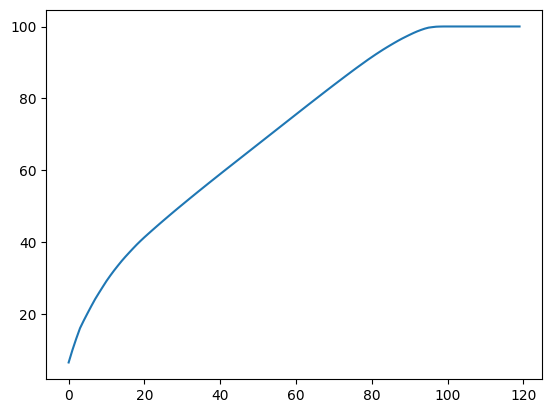

In [64]:
pca = PCA(n_components=120)
pca.fit(X_train_scaled)
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
#Cumulative Variance explains
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [65]:
var

array([  6.43,   9.9 ,  13.05,  15.98,  18.14,  20.18,  22.18,  24.1 ,
        25.82,  27.5 ,  29.15,  30.65,  32.07,  33.41,  34.71,  35.92,
        37.07,  38.2 ,  39.3 ,  40.33,  41.32,  42.27,  43.21,  44.14,
        45.06,  45.97,  46.87,  47.77,  48.66,  49.54,  50.41,  51.28,
        52.15,  53.01,  53.87,  54.72,  55.57,  56.42,  57.26,  58.1 ,
        58.94,  59.78,  60.61,  61.44,  62.27,  63.1 ,  63.93,  64.76,
        65.59,  66.42,  67.25,  68.08,  68.91,  69.74,  70.57,  71.4 ,
        72.23,  73.06,  73.89,  74.72,  75.55,  76.38,  77.21,  78.04,
        78.86,  79.68,  80.5 ,  81.32,  82.14,  82.95,  83.76,  84.56,
        85.36,  86.16,  86.95,  87.74,  88.52,  89.28,  90.04,  90.8 ,
        91.52,  92.24,  92.93,  93.61,  94.26,  94.89,  95.51,  96.11,
        96.68,  97.21,  97.73,  98.23,  98.69,  99.09,  99.45,  99.73,
        99.87,  99.99, 100.03, 100.05, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05, 100.05, 100.05,
      

#### Best number of components is 98.

In [66]:
pca = PCA(n_components=98)
pca_model = pca.fit(X_train_scaled)
X_train_scaled_pca = pca_model.transform(X_train_scaled)

In [67]:
X_test_pca = pca.transform(X_test_scaled)

## Computing sample weights based on distribution of target variable

In [68]:
from sklearn.utils import class_weight

In [69]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

## Training model

In [70]:
from xgboost import XGBClassifier

In [71]:
model = XGBClassifier(n_estimators=300, n_jobs = -1,booster='gbtree')

In [74]:
xgb_model = model.fit(X_train_scaled_pca, y_train, sample_weight=classes_weights)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

[13:20:53] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluating model

In [75]:
predictions = xgb_model.predict(X_test_pca)

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [79]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.17      0.27      0.20       145
           1       0.18      0.43      0.25      2560
           2       0.37      0.59      0.45      9911
           3       0.38      0.48      0.42     12078
           4       0.48      0.54      0.50        56
           5       0.14      0.26      0.18       283
           6       0.96      0.73      0.83     53952

    accuracy                           0.66     78985
   macro avg       0.38      0.47      0.41     78985
weighted avg       0.77      0.66      0.70     78985



In [88]:
cm = confusion_matrix(y_test, predictions, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

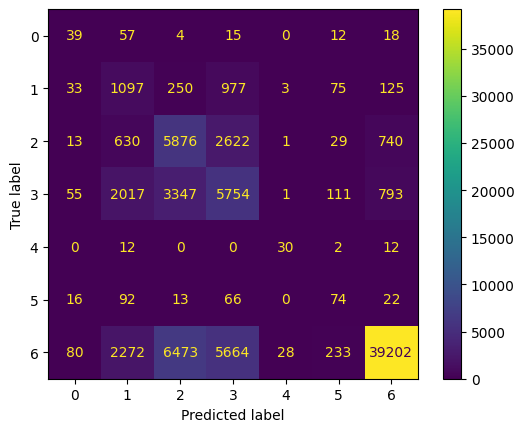

In [89]:
disp.plot()